### 19장 세상에 없는 얼굴 GAN, 오토인코더

#### 4. 이미지의 특징을 추출하는 오토인코더
- 입력 데이터의 특징을 효율적으로 담아낸 이미지를 만들어 냄.
- 오토인코더의 원리   

    <img src="https://thebook.io/img/080228/298.jpg" width="300" align="left">

#  
#  
#  
#  
##  

#### 오토인코더 실습하기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [5]:
# 생성자 모델 만들기
autoencoder = Sequential()

In [6]:
# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [7]:
# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [8]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [9]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.2063 - val_loss: 0.1384
Epoch 2/50
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.1284 - val_loss: 0.1186
Epoch 3/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1154 - val_loss: 0.1101
Epoch 4/50
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.1086 - val_loss: 0.1048
Epoch 5/50
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.1041 - val_loss: 0.1010
Epoch 6/50
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.1010 - val_loss: 0.0992
Epoch 7/50
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0987 - val_loss: 0.0965
Epoch 8/50
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0970 - val_loss: 0.0954
Epoch 9/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0956 - val_

In [11]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)

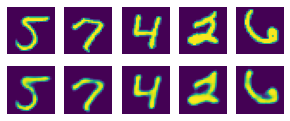

In [13]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)   # 앞서 만든 오토인코더 모델에 넣기

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i + 1)
    # 테스트할 이미지를 먼저 그대로 보여줌
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    # 오토인코딩 결과를 다음 열에 입력
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
plt.show()